In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-07-06 17:42:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-06 17:42:22 (86.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
#Import helper functions going to use in this notebook
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [ ]:
# get data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2023-07-05 18:13:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  23.2MB/s    in 8.2s    

2023-07-05 18:13:44 (19.7 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [ ]:
train_dir= "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data= tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode = "categorical",
                                                                batch_size=BATCH_SIZE)
test_data= tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode = "categorical",
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data.class_names


['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

# Build a feature extraction model with the keras functional api

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)#it s top layer have 1000 but we want 10
#freeze the base model
base_model.trainable=False
#create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
#if use resnet50v2 need to normalize input
#x=tf.keras.layers.experimental.preprocessing.Rscaling(1/255.)(inputs)
x= base_model(inputs)
print(f"Shape after passig inputs through base model: {x.shape}")
#average pool the outputs of the base model(aggregate all the most important info,reduce number of computations)
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after global average pooling: {x.shape}")
#create the output activation layer
outputs=tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)
#combine the input with the output into a model
model_0 = tf.keras.Model(inputs,outputs)
#compile
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#fit
history_0 = model_0.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)),
                        callbacks=[create_tensorboard_callback("transfer_learning","10_percent_feature_ext")])

16705208/16705208 [==============================] - 2s 0us/step


Shape after passig inputs through base model: (None, 7, 7, 1280)
Shape after global average pooling: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_ext/20230705-192613
Epoch 1/5
24/24 [==============================] - 21s 276ms/step - loss: 1.9310 - accuracy: 0.3787 - val_loss: 1.3484 - val_accuracy: 0.7122
Epoch 2/5
24/24 [==============================] - 4s 148ms/step - loss: 1.1197 - accuracy: 0.7613 - val_loss: 0.8765 - val_accuracy: 0.8339
Epoch 3/5
24/24 [==============================] - 5s 176ms/step - loss: 0.7989 - accuracy: 0.8253 - val_loss: 0.7208 - val_accuracy: 0.8355
Epoch 4/5
24/24 [==============================] - 5s 181ms/step - loss: 0.6461 - accuracy: 0.8653 - val_loss: 0.6139 - val_accuracy: 0.8635
Epoch 5/5
24/24 [==============================] - 5s 176ms/step - loss: 0.5518 - accuracy: 0.8813 - val_loss: 0.5513 - val_accuracy: 0.8766


In [ ]:
#evaluate on the full test dataset
model_0.evaluate(test_data)

79/79 [==============================] - 8s 81ms/step - loss: 0.5608 - accuracy: 0.8608


[0.5607903599739075, 0.86080002784729]

In [ ]:
#check the layers şn our base model
for layer_number,layer in enumerate(base_model.layers[:10]):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn


In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


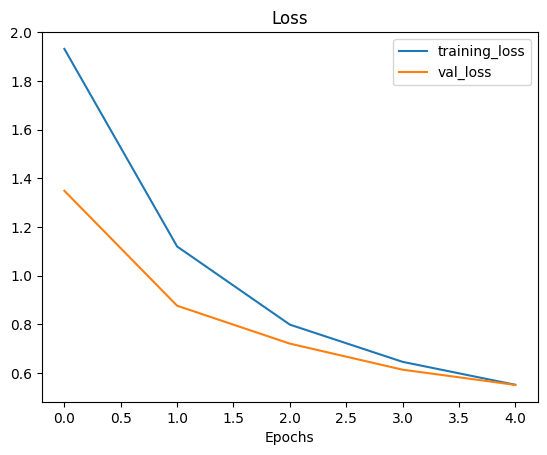

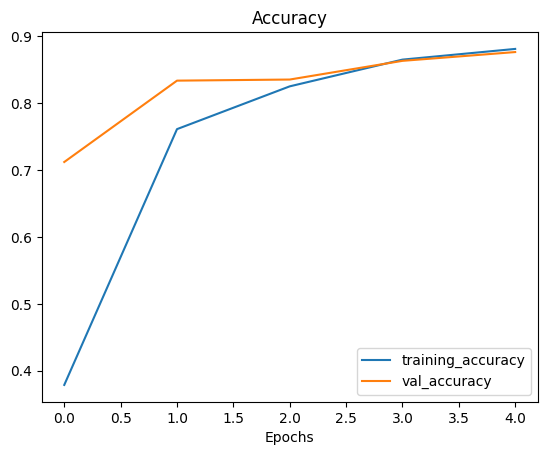

In [ ]:
plot_loss_curves(history_0)

# See how work GlobalAveragePooling

In [ ]:
input_shape = (1,4,4,3)
tf.random.set_seed(42)
input_tensor=tf.random.normal(input_shape)
print(f"random tensor:\n {input_tensor} \n")
gap_tensor=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)#tf.reduce_mean(input_tensor, axis=[1,2])
print(f"2d global average pooled tensor:\n {gap_tensor} \n")

random tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 

2d global average pooled tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]] 



In [ ]:
input_tensor.shape, gap_tensor.shape

(TensorShape([1, 4, 4, 3]), TensorShape([1, 3]))

# Running a series of transfer learning

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2023-07-06 11:05:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 64.233.170.128, 142.251.175.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M  17.9MB/s    in 9.3s    

2023-07-06 11:05:45 (13.6 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [ ]:
train_dir = "10_food_classes_1_percent/train"
test_dir= "10_food_classes_1_percent/test"

In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There a

In [ ]:
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data= tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode = "categorical",
                                                                batch_size=BATCH_SIZE)
test_data= tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode = "categorical",
                                                                batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
print(tf.__version__)

2.12.0


# Add data augmentation to model
To add data augmentation right into our models, we can use the layers inside:
* tf.keras.layers.experimental.preprocessing()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_aug = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2)
    #preprocessing.Rescale(1./255)#keep for models like resnet but efficient dont need
], name="data_aug")

In [ ]:
# Visualize data augmentation layer
#view a random img and compare it is augmented image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data.class_names)
target_dir= "10_food_classes_1_percent/train/" + target_class
print(target_dir)

10_food_classes_1_percent/train/ramen


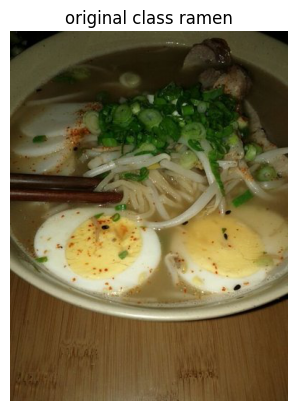

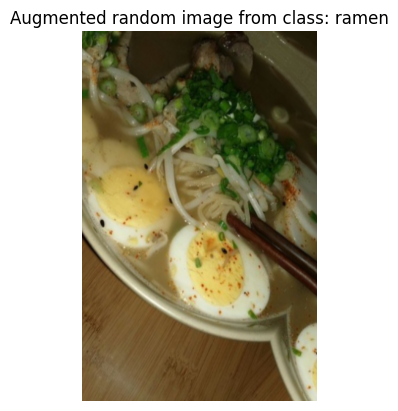

In [ ]:
#augmented_img = data_augmentation(img, training=True)
random_img = random.choice(os.listdir(target_dir))
random_img_path = target_dir + "/" + random_img
#read random image
img = mpimg.imread(random_img_path)
plt.imshow(img)
plt.title(f"original class {target_class}")
plt.axis(False);
# Augment the image
augmented_img = data_aug(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

##Build Model 1

In [ ]:
input_shape = (224,224,3)

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

#create input layer
inputs = layers.Input(shape=input_shape,name="input_layer")

# add in data aug sequential model as a layer
x = data_aug(inputs)

#give base_model the inputs(after augmentation) and dont train it
x = base_model(x,training=False)

#pool output features of the base model
x= layers.GlobalAveragePooling2D(name="global_layer")(x)#when it it just a layer give x to right handside

#put a dense layer on as the output
outputs = layers.Dense(10,activation="softmax",name="output_layer")(x)

#make a model
model_1 = keras.Model(inputs,outputs)

#compile
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit
history_model_1 = model_1.fit(train_data,
                              epochs=5,
                              steps_per_epoch = len(train_data),
                              validation_data=test_data,
                              validation_steps = int(0.25*len(test_data)),
                              #track model training logs
                              callbacks = [create_tensorboard_callback(dir_name="trainsfer_learning",
                                                                       experiment_name="model_1_exp")])

16705208/16705208 [==============================] - 2s 0us/step


Saving TensorBoard log files to: trainsfer_learning/model_1_exp/20230706-111810
Epoch 1/5
3/3 [==============================] - 20s 3s/step - loss: 2.4040 - accuracy: 0.1143 - val_loss: 2.3229 - val_accuracy: 0.1546
Epoch 2/5
3/3 [==============================] - 7s 3s/step - loss: 2.1614 - accuracy: 0.2714 - val_loss: 2.1829 - val_accuracy: 0.2270
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9684 - accuracy: 0.4143 - val_loss: 2.0662 - val_accuracy: 0.3092
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7913 - accuracy: 0.5571 - val_loss: 1.9611 - val_accuracy: 0.3553
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.6130 - accuracy: 0.6571 - val_loss: 1.8675 - val_accuracy: 0.4079


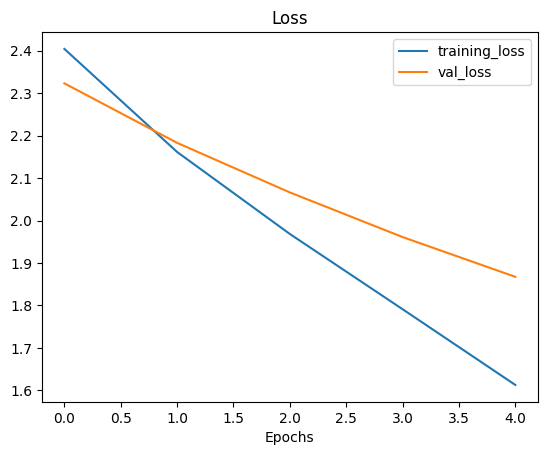

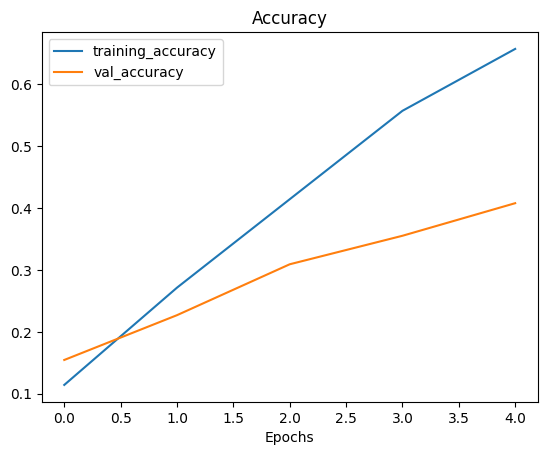

In [ ]:
plot_loss_curves(history_model_1)

# Model 2 : augmented %10 data

In [ ]:
# get data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")
train_dir= "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data= tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode = "categorical",
                                                                batch_size=BATCH_SIZE)
test_data= tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode = "categorical",
                                                                batch_size=BATCH_SIZE)

--2023-07-06 17:42:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 142.250.4.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  22.6MB/s    in 8.5s    

2023-07-06 17:42:40 (19.0 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
data_aug.summary()

Model: "data_aug"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, None, None, 3)     0         
                                                                 
 random_rotation (RandomRota  (None, None, None, 3)    0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, None, None, 3)     0         
                                                                 
 random_height (RandomHeight  (None, None, None, 3)    0         
 )                                                               
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_aug = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2)
    #preprocessing.Rescale(1./255)#keep for models like resnet but efficient dont need
], name="data_aug")

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
input_shape=(224,224,3)
#create input layer
inputs = layers.Input(shape=input_shape,name="input_layer")

# add in data aug sequential model as a layer
x = data_aug(inputs)

#give base_model the inputs(after augmentation) and dont train it
x = base_model(x,training=False)#pass augmented images to base model but keep it in inference mode, this also insures batchnorm layers dont get updated

#pool output features of the base model
x= layers.GlobalAveragePooling2D(name="global_layer")(x)#when it it just a layer give x to right handside

#put a dense layer on as the output
outputs = layers.Dense(10,activation="softmax",name="output_layer")(x)

#make a model
model_2 = keras.Model(inputs,outputs)

#compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


#Model Checkpoint (weights only)

In [ ]:
path = "checkpoint_weights/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq="epoch",#save every epoch
                                                         verbose=1)

#fit model 2 with checkpoint

In [ ]:
history_model_2 = model_2.fit(train_data,
                              epochs=5,
                              validation_data=test_data,
                              validation_steps=int(0.25 * len(test_data)),
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                     experiment_name = "model_2_exp"),
                                         checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/model_2_exp/20230706-182911
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0258 - accuracy: 0.3267
Epoch 1: val_loss improved from inf to 1.48749, saving model to checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 20s 534ms/step - loss: 2.0258 - accuracy: 0.3267 - val_loss: 1.4875 - val_accuracy: 0.6826
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3324 - accuracy: 0.6947
Epoch 2: val_loss improved from 1.48749 to 1.01137, saving model to checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 10s 410ms/step - loss: 1.3324 - accuracy: 0.6947 - val_loss: 1.0114 - val_accuracy: 0.7944
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0050 - accuracy: 0.7653
Epoch 3: val_loss improved from 1.01137 to 0.83116, saving model to checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 11s 428ms/step - loss: 1.0050 - 

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 89ms/step - loss: 0.6290 - accuracy: 0.8376


[0.6289747953414917, 0.8375999927520752]

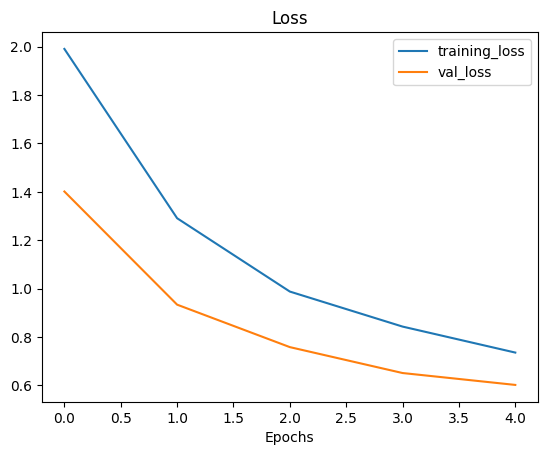

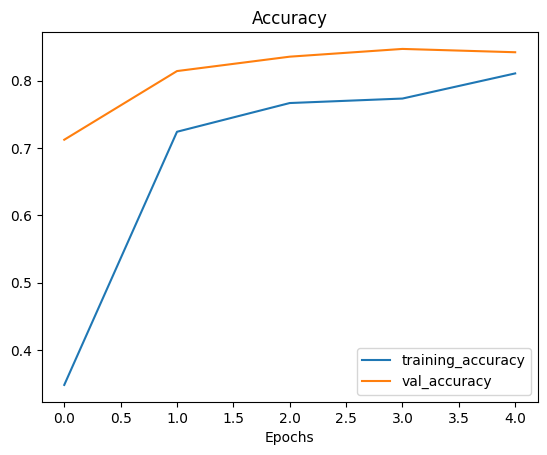

In [ ]:
plot_loss_curves(history_model_2)

# Load checkpointed weights

In [ ]:
model_2.load_weights(path)

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 76ms/step - loss: 0.6324 - accuracy: 0.8480


[0.6323693990707397, 0.8479999899864197]

# Model 3 Fine tuning

In [ ]:
base_model.trainable=True

for layer in base_model.layers[:-10]:
  layer.trainable=False

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [ ]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_10 False
1 rescaling_18 False
2 normalization_9 False
3 rescaling_19 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze F

In [ ]:
len(model_2.trainable_variables)

12

In [ ]:
initial_epochs= 5
fine_tune_epochs = initial_epochs+5

history_model_3 = model_2.fit(train_data,
                              epochs=fine_tune_epochs,
                              validation_data=test_data,
                              validation_steps=int(0.25*len(test_data)),
                              initial_epoch=history_model_2.epoch[-1],#start training from previous last epoch of history_model_2 so it is going to start fine tuning(also fitting) from previous last epoch
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="model_3_exp")])

Saving TensorBoard log files to: transfer_learning/model_3_exp/20230706-183621
Epoch 5/10
24/24 [==============================] - 24s 525ms/step - loss: 0.6392 - accuracy: 0.8187 - val_loss: 0.5232 - val_accuracy: 0.8322
Epoch 6/10
24/24 [==============================] - 11s 469ms/step - loss: 0.5186 - accuracy: 0.8440 - val_loss: 0.4826 - val_accuracy: 0.8438
Epoch 7/10
24/24 [==============================] - 12s 430ms/step - loss: 0.4482 - accuracy: 0.8627 - val_loss: 0.4613 - val_accuracy: 0.8454
Epoch 8/10
24/24 [==============================] - 11s 456ms/step - loss: 0.4108 - accuracy: 0.8787 - val_loss: 0.4542 - val_accuracy: 0.8569
Epoch 9/10
24/24 [==============================] - 10s 409ms/step - loss: 0.3485 - accuracy: 0.8947 - val_loss: 0.4630 - val_accuracy: 0.8438
Epoch 10/10
24/24 [==============================] - 9s 363ms/step - loss: 0.3302 - accuracy: 0.8987 - val_loss: 0.4462 - val_accuracy: 0.8487


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 86ms/step - loss: 0.4367 - accuracy: 0.8564


[0.43669337034225464, 0.8564000129699707]

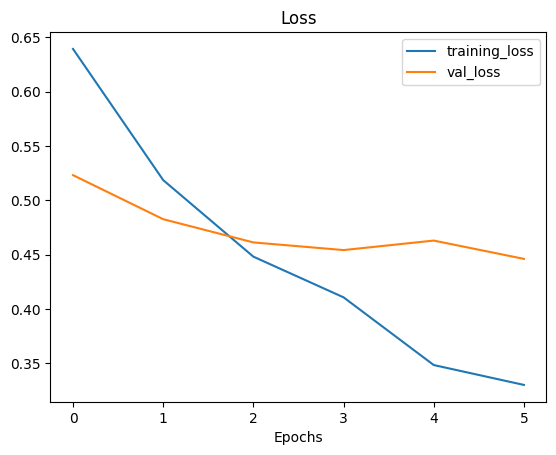

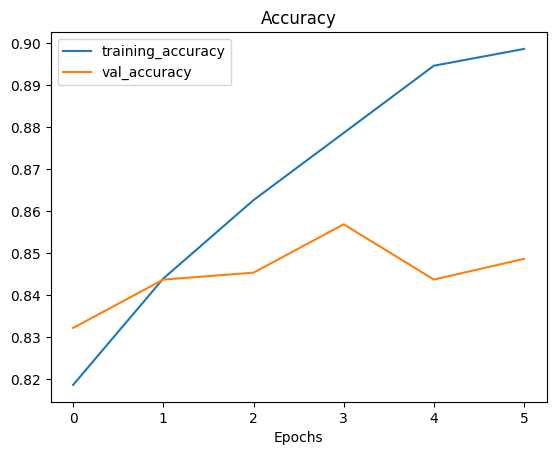

In [ ]:
plot_loss_curves(history_model_3)

In [ ]:
#Lets create a function to compare training histories
import matplotlib.pyplot as plt
def compare_historys(original_history,new_history,initial_epochs=5):
  #get original history measurements
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  #combine original metrics with new ones
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  #make plot
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label="Training Accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  #make plot
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss,label="Training Loss")
  plt.plot(total_val_loss, label="Val Loss")
  plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")

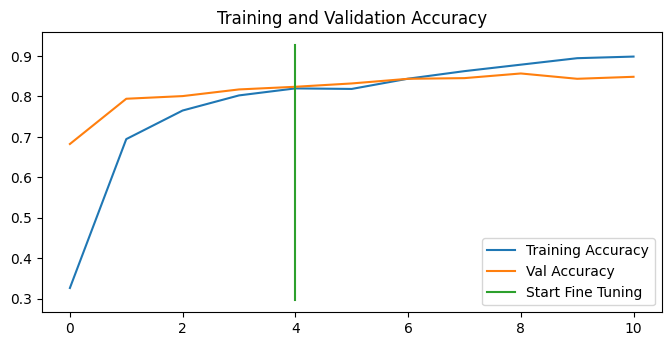

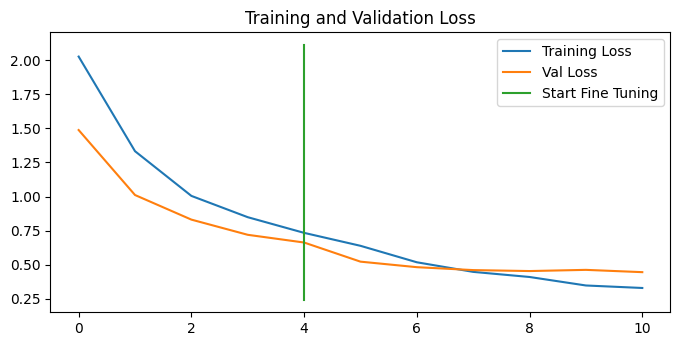

In [ ]:
compare_historys(history_model_2,history_model_3,initial_epochs=5)